In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("credit-dynamics-20240116.csv")

In [3]:
df = df.dropna(how='all')

In [4]:
import networkx as nx

In [5]:
df

,UID,Name,Actor,Algorithm,Process,Choices (optional),Effects,Regulations,Note
0,AdC,Advertise Credit,Lender,True,NaN,"Rates, Terms, Target Audience",AP,"UDNDR, UDFR, UDNA, ECND, FHAND, TILA",District court in the 7th Cir. just found pros...
1,AP,Apply for Credit,Borrower,NaN,1.0,NaN,RI,NaN,NaN
2,RI,Request for Information from applicant,Lender,NaN,1.0,NaN,EC,"ECND, ECN, FHAND",NaN
3,EC,Evaluate for Credit,Lender,True,1.0,Offer/decline/terminate open-end credit,"OC,DC","ECND, ECN, FHAND",NaN
4,DC,Decline to Offer Credit,Lender,NaN,1.0,Explanations,CH+,"ECND, ECN, FCRANA, FHAND",Can we combine DC and OC ?
5,OC,Offer Credit,Lender,True,1.0,"Rates, Terms, Explanations","AC, CH+","UDNDR, ECND, ECN, FCRANA, FHAND, TILA",NaN
6,AC,Accept Credit,Borrower,NaN,1.0,Yes/No,PB,NaN,Q: would this affect CH if not accepted?
7,PB,Pay Back,Borrower,NaN,1.0,Pay/Default,CH+,NaN,NaN
10,CH,Credit History,Borrower,NaN,1.0,NaN,"CS, SocD",NaN,NaN
11,LE,Life Events,Borrower,NaN,1.0,NaN,"PD, SC",NaN,NaN


In [6]:
g = nx.DiGraph()

for row in df.iterrows():
    uid = row[1]['UID']
    
    name = row[1]['Name']
    actor = row[1]['Actor']
    algorithm = row[1]['Algorithm']
    regulations = row[1]['Regulations']
    
    # print(str(uid) + " " + str(actor))
    
    data = {
        'long_name' : name,
        'actor' : actor,
        'algorithm' : algorithm,
        'regulations': regulations
    }
    
    # print(data)
    
    g.add_node(uid, **data)
    
    # print(dict(g.nodes(data=True)))
    
for row in df.iterrows():
    tail = row[1]['UID']
    for head in row[1]['Effects'].split(','):
        g.add_edge(tail, head.strip())

In [7]:
dict(g.nodes(data=True))

{'AdC': {'long_name': 'Advertise Credit',
  'actor': 'Lender',
  'algorithm': True,
  'regulations': 'UDNDR, UDFR, UDNA, ECND, FHAND, TILA'},
 'AP': {'long_name': 'Apply for Credit',
  'actor': 'Borrower',
  'algorithm': nan,
  'regulations': nan},
 'RI': {'long_name': 'Request for Information from applicant',
  'actor': 'Lender',
  'algorithm': nan,
  'regulations': 'ECND, ECN, FHAND'},
 'EC': {'long_name': 'Evaluate for Credit',
  'actor': 'Lender',
  'algorithm': True,
  'regulations': 'ECND, ECN, FHAND'},
 'DC': {'long_name': 'Decline to Offer Credit',
  'actor': 'Lender',
  'algorithm': nan,
  'regulations': 'ECND, ECN, FCRANA, FHAND'},
 'OC': {'long_name': 'Offer Credit',
  'actor': 'Lender',
  'algorithm': True,
  'regulations': 'UDNDR, ECND, ECN, FCRANA, FHAND, TILA'},
 'AC': {'long_name': 'Accept Credit',
  'actor': 'Borrower',
  'algorithm': nan,
  'regulations': nan},
 'PB': {'long_name': 'Pay Back ',
  'actor': 'Borrower',
  'algorithm': nan,
  'regulations': nan},
 'CH': {

In [8]:
actor_colors = {
    'Borrower' : 'y',
    'Lender' : 'g',
    'Credit Scorer' : 'm'
}

def actor_color_lookup(n):
    data = g.nodes(data=True)[n]
    
    if 'actor' in data and data['actor'] in actor_colors:
        return actor_colors[data['actor']]
    else:
        return 'w'

/tmp/ipykernel_16356/951387269.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(g, prog='dot', root=None)


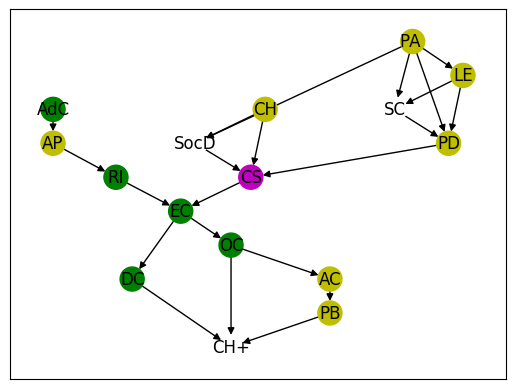

In [9]:
pos = nx.nx_pydot.graphviz_layout(g, prog='dot', root=None)

actor_node_colors = [actor_color_lookup(n) for n in g.nodes()]

nx.draw_networkx(g, pos = pos, with_labels = True, node_color = actor_node_colors)

In [10]:
actor_node_colors 

['g',
 'y',
 'g',
 'g',
 'g',
 'g',
 'y',
 'y',
 'y',
 'y',
 'm',
 'w',
 'w',
 'y',
 'y',
 'w']

In [11]:
g.nodes(data=True)

NodeDataView({'AdC': {'long_name': 'Advertise Credit', 'actor': 'Lender', 'algorithm': True, 'regulations': 'UDNDR, UDFR, UDNA, ECND, FHAND, TILA'}, 'AP': {'long_name': 'Apply for Credit', 'actor': 'Borrower', 'algorithm': nan, 'regulations': nan}, 'RI': {'long_name': 'Request for Information from applicant', 'actor': 'Lender', 'algorithm': nan, 'regulations': 'ECND, ECN, FHAND'}, 'EC': {'long_name': 'Evaluate for Credit', 'actor': 'Lender', 'algorithm': True, 'regulations': 'ECND, ECN, FHAND'}, 'DC': {'long_name': 'Decline to Offer Credit', 'actor': 'Lender', 'algorithm': nan, 'regulations': 'ECND, ECN, FCRANA, FHAND'}, 'OC': {'long_name': 'Offer Credit', 'actor': 'Lender', 'algorithm': True, 'regulations': 'UDNDR, ECND, ECN, FCRANA, FHAND, TILA'}, 'AC': {'long_name': 'Accept Credit', 'actor': 'Borrower', 'algorithm': nan, 'regulations': nan}, 'PB': {'long_name': 'Pay Back ', 'actor': 'Borrower', 'algorithm': nan, 'regulations': nan}, 'CH': {'long_name': 'Credit History', 'actor': 'Bo

In [12]:
df

,UID,Name,Actor,Algorithm,Process,Choices (optional),Effects,Regulations,Note
0,AdC,Advertise Credit,Lender,True,NaN,"Rates, Terms, Target Audience",AP,"UDNDR, UDFR, UDNA, ECND, FHAND, TILA",District court in the 7th Cir. just found pros...
1,AP,Apply for Credit,Borrower,NaN,1.0,NaN,RI,NaN,NaN
2,RI,Request for Information from applicant,Lender,NaN,1.0,NaN,EC,"ECND, ECN, FHAND",NaN
3,EC,Evaluate for Credit,Lender,True,1.0,Offer/decline/terminate open-end credit,"OC,DC","ECND, ECN, FHAND",NaN
4,DC,Decline to Offer Credit,Lender,NaN,1.0,Explanations,CH+,"ECND, ECN, FCRANA, FHAND",Can we combine DC and OC ?
5,OC,Offer Credit,Lender,True,1.0,"Rates, Terms, Explanations","AC, CH+","UDNDR, ECND, ECN, FCRANA, FHAND, TILA",NaN
6,AC,Accept Credit,Borrower,NaN,1.0,Yes/No,PB,NaN,Q: would this affect CH if not accepted?
7,PB,Pay Back,Borrower,NaN,1.0,Pay/Default,CH+,NaN,NaN
10,CH,Credit History,Borrower,NaN,1.0,NaN,"CS, SocD",NaN,NaN
11,LE,Life Events,Borrower,NaN,1.0,NaN,"PD, SC",NaN,NaN
